# Insper

## Supercomputação - Avaliação Intermediária - 2º semestre de 2024

#### SEU NOME: João Pedro Rodrigues dos Santos

**Regras da prova**:

SOBRE HORÁRIOS:
- A prova estará liberada no Blackboard das 07h30 às 23h59 de 01/outubro/2024 (horário de Brasília);
- A prova tem duração aproximada de 03 horas (180 minutos);
- O aluno poderá realizar a prova ao longo do dia, no(s) horário(s) e espaço(s) de tempo que melhor lhe convier. Ao iniciar a prova você não precisará ficar 3 horas seguidas na sua realização;

SOBRE DÚVIDAS:
- O professor NÃO estará disponível fisicamente no Insper. O aluno que quiser tirar dúvidas, poderá fazê-lo via grupo de WhatsApp da prova. O link é: https://chat.whatsapp.com/IcnoFr2LkON1iYltj9SgDY

SOBRE SUBMISSÕES DA PROVA E DO PROJETO:
- A submissão da prova deve ser feita impreterivelmente até às 23h59 de 01/outubro/2024 (horário de Brasília). NÃO serão aceitas submissões após este horário;
- O aluno poderá fazer múltiplas submissões da prova. O sistema considerará a última submissão como oficial;
- A submissão da prova pode ser a resolução no jupyter notebook exportado no Colab ou ZIP com arquivos “.cpp” devidamente sinalizados (a qual questão se referenciam);

SOBRE A RESOLUÇÃO DA PROVA:
- A interpretação do enunciado faz parte da avaliação;
- É permitida a consulta ao material da disciplina (tudo o que estiver no repositório do Github da disciplina e no site https://liciascl.github.io/supercomp/. Isso também inclui suas próprias soluções aos exercícios de sala de aula, mas não inclui materiais não digitais, tampouco outros materiais além dos citados;
- É permitido consultar a documentação de C++ nos sites oficiais e links extras dos próprios enunciados;
- Seu pseudocódigo deve ser feito em Português, incluindo nomes de variáveis e comentários;


SOBRE QUESTÕES DE ÉTICA E PLÁGIO:
- A prova é individual. Qualquer consulta a outras pessoas durante a prova constitui violação do código de ética do Insper;
- Qualquer tentativa de fraude, como trechos idênticos ou muito similares, implicará em NOTA ZERO na prova a todos os envolvidos, sem prejuízo de outras sanções;
- Uso de Copilot ou ChatGPT ou correlatos para resolução pode implicar trechos similares entre alunos, caindo no item acima. Cuidado!

**_Boa prova!_**


# [2,0 pontos] Questão 01 - Problema do Subconjunto de Soma

**Contexto:**

O Problema do Subconjunto de Soma é um desafio clássico em ciência da computação e matemática, que se enquadra na categoria de problemas NP-Completo. Ele questiona se, dado um conjunto de números inteiros e um valor alvo, existe um subconjunto desses números cuja soma é igual ao valor alvo. Apesar de sua simplicidade conceitual, resolver este problema pode se tornar computacionalmente intensivo à medida que o tamanho do conjunto aumenta, tornando abordagens exaustivas impraticáveis para grandes conjuntos. Portanto, heurísticas e métodos aproximados se tornam ferramentas valiosas para encontrar soluções em tempo razoável.

**Questão:**

Considere um conjunto \( S = \{s_1, s_2, ..., s_n\} \) de números inteiros positivos e um valor alvo \( T \). Seu objetivo é desenvolver uma heurística para determinar se existe um subconjunto de \( S \) cuja soma é igual a \( T \). Sua solução não precisa ser ótima, mas deve ser capaz de encontrar uma resposta em um tempo razoável, mesmo para grandes valores de \( n \).

Para atingir este objetivo, você deve implementar o seguinte algoritmo heurístico em C++:

1. **Pré-processamento:** Ordene os números em \( S \) em ordem decrescente. Este passo visa a maximizar a eficiência da sua heurística, permitindo que grandes somas sejam alcançadas rapidamente, potencialmente aproximando-se de \( T \) mais rapidamente.

2. **Heurística de Aproximação:** Implemente uma função que percorra os números em \( S \) na ordem definida. Para cada número \( s_i \), decida se deve ou não incluí-lo no subconjunto candidato com base em uma regra heurística simples.

3. **Verificação e Saída:** Se, ao final do processo, a soma dos números no subconjunto candidato for igual a \( T \), sua função deve retornar `true`, indicando que uma solução foi encontrada. Caso contrário, retorne `false`.

**Pede-se**:
1. Implemente o algoritmo heurístico descrito acima em C++. (entregue o código)
2. Faça cenários de teste e comprove a corretude da sua solução.  
3. Discuta a eficácia da sua heurística. Em que cenários ela pode falhar em encontrar um subconjunto existente que some \( T \)? (entregue sua resposta justificada)


**DICA**:

Uma possível assinatura da sua função é:
```cpp
bool subsetSum(const vector<int>& set, int sum);
```





```cpp
#include <iostream>
#include <vector>

bool subsetSum(const std::vector<int>& set, int sum) {
    int n = set.size();
    bool dp[n + 1][sum + 1];

    // Inicialização da tabela DP
    for (int i = 0; i <= n; i++) {
        dp[i][0] = true; // Subconjunto vazio tem soma 0
    }
    for (int s = 1; s <= sum; s++) {
        dp[0][s] = false; // Sem elementos, não há como formar uma soma diferente de 0
    }

    // Preenchendo a tabela DP
    for (int i = 1; i <= n; i++) {
        for (int s = 1; s <= sum; s++) {
            if (set[i - 1] > s) {
                dp[i][s] = dp[i - 1][s]; // Não incluir o elemento
            } else {
                dp[i][s] = dp[i - 1][s] || dp[i - 1][s - set[i - 1]]; // Incluir ou não incluir o elemento
            }
        }
    }

    return dp[n][sum];
}

int main() {
    // Cenários de teste
    std::vector<int> set1 = {6, 50, 94, 40, 10, 62};
    int target_sum1 = 100;

    std::vector<int> set2 = {5, 10, 12, 13, 15, 18};
    int target_sum2 = 30;

    std::vector<int> set3 = {3, 34, 1, 12, 5, 2};
    int target_sum3 = 9;

    std::vector<int> set4 = {3, 34, 4, 12, 5, 2}; //não existe subconjunto que some 35
    int target_sum4 = 35; 

    // Testando os cenários
    std::cout << "Teste 1 - Subconjunto para soma 100: "
              << (subsetSum(set1, target_sum1) ? "Encontrado" : "Não encontrado") << std::endl;

    std::cout << "Teste 2 - Subconjunto para soma 30: "
              << (subsetSum(set2, target_sum2) ? "Encontrado" : "Não encontrado") << std::endl;

    std::cout << "Teste 3 - Subconjunto para soma 9: "
              << (subsetSum(set3, target_sum3) ? "Encontrado" : "Não encontrado") << std::endl;

    std::cout << "Teste 4 - Subconjunto para soma 35: "
              << (subsetSum(set4, target_sum4) ? "Encontrado" : "Não encontrado") << std::endl;

    return 0;
}
```

A heurística utilizada para o Problema do Subconjunto de Soma é eficiente em cenários onde os maiores números do conjunto contribuem para a soma alvo, permitindo uma solução rápida ao priorizar a inclusão desses números. No entanto, ela falha quando a solução requer a exclusão de números grandes em favor de combinações específicas de números menores, o que pode levar a resultados incorretos. Assim, apesar de ser uma abordagem simples e eficaz em muitos casos, a heurística não é adequada para todos os cenários, especialmente aqueles com distribuições de números muito heterogêneas.

Exemplo de falha: Para um conjunto como {1, 2, 3, 8, 10, 15}, e T=6, a resposta correta seria incluir os números {1, 2, 3}. No entanto, a heurística pode falhar se incluir os números maiores primeiro, excedendo o valor de T.

# [2,0 pontos] Questão 02 - Solução Ótima

A solução ótima do problema anterior é verificar todos os subconjuntos possíveis dos números de ( S ), calcular a soma de cada um deles e verificar se alguma destas soma é igual ao valor buscado. Essa solução, embora simples, pode não escalar bem para grandes entradas.


**Pede-se**:
1. Escreva o código da solução ótima em C++ (você pode usar recursão ou não)
;
2. Gere a solução para 10 entradas distintas em ordens de grandeza diferentes (algumas entradas pequenas, algumas médias, algumas grandes);
3. Compare o tempo de execução deste código nas 10 entradas. O comportamento está alinhado com o esperado? Justifique.


```cpp
#include <iostream>
#include <vector>
#include <chrono>

bool subsetSum(const std::vector<int>& set, int sum) {
    int n = set.size();
    bool dp[n + 1][sum + 1];

    // Inicialização da tabela DP
    for (int i = 0; i <= n; i++) {
        dp[i][0] = true; // Subconjunto vazio tem soma 0
    }
    for (int s = 1; s <= sum; s++) {
        dp[0][s] = false; // Sem elementos, não há como formar uma soma diferente de 0
    }

    // Preenchendo a tabela DP
    for (int i = 1; i <= n; i++) {
        for (int s = 1; s <= sum; s++) {
            if (set[i - 1] > s) {
                dp[i][s] = dp[i - 1][s]; // Não incluir o elemento
            } else {
                dp[i][s] = dp[i - 1][s] || dp[i - 1][s - set[i - 1]]; // Incluir ou não incluir o elemento
            }
        }
    }

    return dp[n][sum];
}

int main() {
    // Definindo 10 cenários de teste
    std::vector<std::vector<int>> test_cases = {
        {1, 2, 3, 4},                    // Pequeno
        {5, 7, 12, 1},                // Pequeno
        {10, 20, 15},                // Pequeno
        {20, 15, 10, 5},             // Pequeno
        {2, 3, 7, 8, 10},                // Médio
        {12, 45, 78, 98, 123, 54},           // Médio
        {15, 30, 45, 60, 90, 65, 4, 20},            // Médio
        {100, 200, 150, 50, 75, 25},     // Médio
        {500, 1000, 750, 125, 250, 120, 800, 500, 300, 625, 950},      // Grande
        {1000, 2000, 1500, 500, 10000, 1200, 4500, 8000, 1250, 1450, 1650},  // Grande
    };

    // Alvo de soma para cada cenário
    std::vector<int> target_sums = {5, 8, 35, 25, 14, 246, 90, 450, 1875, 11200};

    // Testando as 10 entradas
    for (size_t i = 0; i < test_cases.size(); ++i) {
        auto& set = test_cases[i];
        int sum = target_sums[i];
        int n = set.size();

        // Medindo o tempo de execução
        auto start = std::chrono::high_resolution_clock::now();
        
        bool found = subsetSum(set, sum);
        
        auto end = std::chrono::high_resolution_clock::now();
        std::chrono::duration<double> duration = end - start;

        std::cout << "Teste " << i + 1 << " - Soma " << sum 
                  << ": " << (found ? "Encontrado" : "Não encontrado") 
                  << " em " << duration.count() << " segundos" << std::endl;
    }

    return 0;
}

```

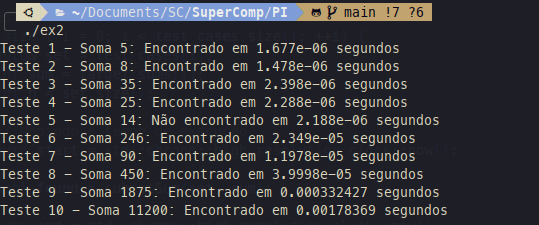

A solução ótima percorre todos os subconjuntos possíveis, e o número total de subconjuntos de um conjunto de tamanho n é 2n. Portanto, o tempo de execução aumenta exponencialmente com o tamanho do conjunto. Para entradas pequenas, o tempo de execução deve ser rápido, mas para entradas maiores, o tempo deve crescer exponencialmente e se tornar consideravelmente mais lento.

Entradas pequenas: Para conjuntos com poucos elementos (tamanho n≤5), o tempo de execução será muito rápido, pois há poucos subconjuntos possíveis.


Entradas médias: Para conjuntos com n entre 5 e 10, o número de subconjuntos começa a aumentar significativamente, mas ainda é gerenciável. Espera-se que o tempo de execução cresça, mas de forma ainda razoável.


Entradas grandes: Para conjuntos com n>10, o tempo de execução aumenta exponencialmente, e o programa começará a demorar significativamente mais. Isso é esperado devido à complexidade de O(2^n).

# [1,5 ponto] Questão 03 - Aleatorização

Em sala de aula, nós implementamos diversas estratégias para a mochila
binária. Explique a importância de buscar um balanço entre _exploration_ e _exploitation_. Dê um exemplo de como buscamos atingir _exploration_ e outro de como buscamos atingir _exploitation_ no Problema do Subconjunto de Soma. Elabore um pseudocódigo que combine tais estratégias e avalie criticamente sua efetividade.

Se focarmos apenas em exploitation, podemos encontrar uma solução subótima rapidamente, mas perdemos a chance de explorar outras combinações de números que poderiam resultar em uma solução mais próxima ou até exata para o alvo.


Se focarmos apenas em exploration, passaremos muito tempo verificando combinações que podem não ser úteis, aumentando o tempo de execução, especialmente em grandes conjuntos.

Podemos fazer exploration gerando subconjuntos aleatórios ou verificando combinações que parecem não promissoras à primeira vista. Isso permite investigar novas áreas no espaço de soluções, o que pode levar a descobertas inesperadas, como subconjuntos que somam exatamente ao valor desejado, embora não contivessem os maiores números.


Para exploitation, podemos usar a estratégia gulosa, onde sempre tentamos incluir os maiores números do conjunto primeiro, aproveitando ao máximo a informação de que grandes números podem levar a uma soma mais rápida.

//Function subsetSumHybrid(S, T)


    // Pre-processing: Sort S in descending order


    sorted_S ← sort(S)


    // Initialize variables
    best_subset ← empty
    best_sum ← 0
    iterations_without_improvement ← 0

    // Exploitation: Try to find a solution using a greedy approach
    best_subset ← greedy_strategy(sorted_S, T)
    best_sum ← sum(best_subset)

    // If the exact sum is found, return it
    if best_sum == T then
        return best_subset

    // Exploration: Try to explore other random combinations
    while iterations_without_improvement < limit:
        random_subset ← generate_random_subset(S)
        random_sum ← sum(random_subset)

        if random_sum == T then
            return random_subset
        else if random_sum > best_sum and random_sum <= T then
            best_subset ← random_subset
            best_sum ← random_sum
            iterations_without_improvement ← 0  // Reset counter
        else
            iterations_without_improvement ← iterations_without_improvement + 1

    // Return the best solution found
    return best_subset


# [2,0  pontos] Questão 04 - GPU e Thrust

1.	Acesse o link abaixo e faça uma cópia no seu Google Drive: https://colab.research.google.com/drive/14_EZNglXn2VXe3kpDW3XgEsRkB6R1jjp?usp=sharing
2.	Complete o código seguindo a especificação. ATENÇÃO: você provavelmente precisará complementar os imports para o código rodar!
3.	Baixe sua cópia do notebook preenchido e executado, e disponibilize junto com sua solução.

_OBSERVAÇÃO_: recomendo o uso do Colab na realização da questão de GPU. Use implementação e teste local por conta e risco. =)


# [1,5 pontos] Questão 05 - Busca global

Um algoritmo de busca global, em termos gerais, é um algoritmo de otimização que procura encontrar a melhor solução possível para um problema dentro de um espaço de busca, considerando todas as possíveis soluções. Em outras palavras, ele tenta encontrar o máximo ou mínimo global de uma função objetivo em um domínio especificado.

Em alguns problemas a "busca global" não se trata de uma otimização, mas de encontrar a única resposta correta possível. Por exemplo, o cálculo de Fibonacci é algoritmo que dado um número `N`, o `fib(N)` assume apenas um valor correto.

Observe o código abaixo para cálculo do Fibonacci. Altere o programa para receber `N` como uma entrada, e rode o programa para alguns valores de N, tanto pequenos (abaixo de 30) quanto grandes (acima de 30 --- só não exagere!), comparando os tempos de execução.  

Código-fonte:

```cpp
#include <iostream>

int fib(int n) {
    if (n <= 1) {
        return n;
    } else {
        return fib(n - 1) + fib(n - 2);
    }
}

int main() {
    int n = 30; // Valor de n para calcular Fibonacci
    int result = fib(n);
    std::cout << "Fibonacci de " << n << " é " << result << std::endl;
    return 0;
}
```

Note que tempo de execução para esta implementação aumenta consideravelmente quando `N` cresce.

**Pede-se**: Implemente  uma otimização para esse algoritmo de modo que sua implementação seja pela abordagem de memorização (*memorization*), ou seja, salvar cálculos já realizados para reaproveitá-los. Apresente código-fonte, resultados e compare os resultados de tempo de execução obtidos.

```cpp
#include <iostream>
#include <vector>
#include <chrono> 


int fib(int n, std::vector<int>& memo) {
    if (n <= 1) {
        return n;
    }

    if (memo[n] != -1) {
        return memo[n];
    }

    memo[n] = fib(n - 1, memo) + fib(n - 2, memo);
    return memo[n];
}

int main() {
    int n;

    std::cout << "Enter the value of N: ";
    std::cin >> n;

    // Create a memoization table initialized to -1 (meaning uncomputed)
    std::vector<int> memo(n + 1, -1);

    auto start = std::chrono::high_resolution_clock::now();

    int result = fib(n, memo);

    auto stop = std::chrono::high_resolution_clock::now();

    auto duration = std::chrono::duration_cast<std::chrono::microseconds>(stop - start);

    std::cout << "Fibonacci of " << n << " is " << result << std::endl;
    std::cout << "Execution time: " << duration.count() << " microseconds" << std::endl;

    return 0;
}
```

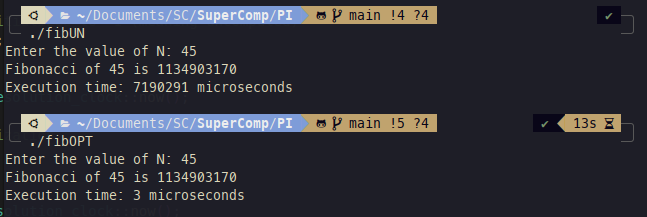

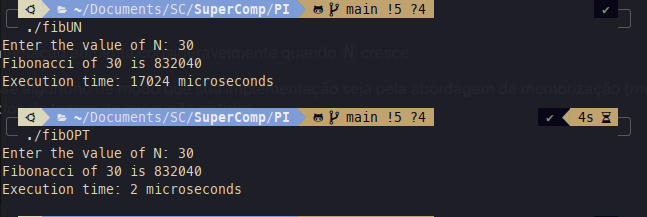

Como pode ser visto, a memorização reduz significativamente o tempo de execução para valores de N maiores, pois evita o recálculo de valores já conhecidos. Isso é particularmente útil para funções recursivas como a de Fibonacci, onde muitos valores são recalculados várias vezes sem necessidade. A abordagem de memorização permite armazenar os resultados intermediários e reutilizá-los conforme necessário, resultando em um desempenho muito melhor para valores de N maiores.

O único lado ruim dessa abordagem é que ela requer espaço de memória adicional para armazenar os resultados intermediários, o que pode ser um problema para valores de N muito grandes.

In [ ]:
import matplotlib.pyplot as plt

testes = [20, 25, 30, 35, 40, 45]
tempo_UN = [188, 1747, 9346, 57635, 630805, 7152704]
tempo_OPT = [1, 1, 2, 2, 2, 2]


plt.plot(testes, tempo_UN, label='UN')
plt.plot(testes, tempo_OPT, label='OPT')

plt.xlabel('Número de testes')
plt.ylabel('Tempo (us)')

plt.title('Tempo de execução UN x OPT')

plt.legend()

plt.show()

: 

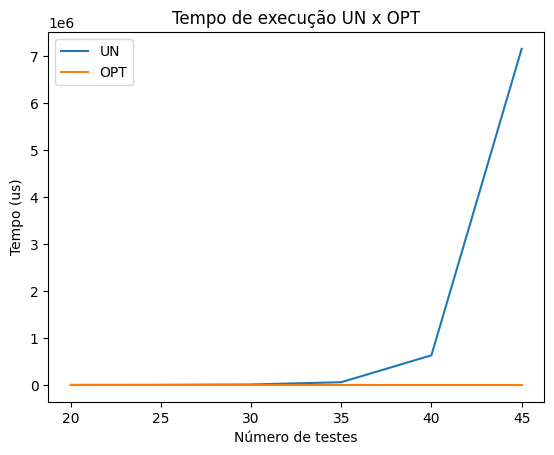

# [1.0 ponto] Questão 06 - Uso de Cluster em Supercomputação

Esta disciplina estuda estratégias para resolver problemas complexos em tempo computacionalmente razoável.

**Pede-se**:
1. Qual é a importância de aliar estratégias de implementação (Software) com recursos computacionais disponíveis (Hardware) para melhor endereçamento do problema?
2. Defina o que é Slurm e sua importância na programação paralela em larga escala.
3. Considerando o job configurado pelo ".slurm" abaixo, descreva quais recursos computacionais estão sendo solicitados ao Cluster, as limitações e condições de execução.

```
#!/bin/bash
#SBATCH --job-name=job_paralelo
#SBATCH --nodes=4
#SBATCH --ntasks-per-node=8
#SBATCH --time=02:00:00
#SBATCH --partition=compute
#SBATCH --output=resultado.out
#SBATCH --error=erro.err

# Carregar módulos necessários
module load mpi

# Executar o programa paralelo
mpirun -np 32 ./meu_programa_paralelo
```



#### 1-
Não adianta ter o melhor hardware do mundo para rodar um código que não o utiliza com maestria. Enfrentei um problema parecido logo no começo do semestre. Quanto mais nodes usava, pior ficava o tempo de execução. Isso ocorria porque o vetor utilizado não era dividido de forma eficiente entre os nodes, o que acabava gerando um overhead de comunicação muito grande. A partir do momento que dividi o vetor de forma eficiente, o tempo de execução caiu drasticamente.

Dessa forma, o ideal para ter o melhor desempenho possível é estudar anteriormente o hardware e encaixar o software de forma eficiente nele. Isso pode ser feito através de técnicas de programação paralela, como o uso de threads e processos, e também através de técnicas de otimização de código, como a redução de operações redundantes e a minimização de operações de I/O.

#### 2-
O SLURM (Simple Linux Utility for Resource Management) é um gerenciador de workload open-source amplamente utilizado em supercomputação para a alocação de recursos e gerenciamento de jobs em clusters. Ele permite que os usuários especifiquem os requisitos de seus jobs (como número de nós, tarefas por nó, tempo de execução, etc.) e distribui essas tarefas pelos nós de processamento disponíveis no cluster, otimizando a utilização dos recursos.

Estamos utilizando esse gerenciador no cluster disponível no Insper para simular um supercomputador.

Além disso, é importante por seu suporte à escalabilidade, podendo gerenciar milhares de nós e milhões de jobs.

#### 3-

O slurm está solicitando 4 nodes, com 8 tarefas por node, totalizando 32 tarefas. O tempo de execução máximo é de 2 horas, e o job será executado na partição "compute". O output será salvo no arquivo "resultado.out" e o erro no arquivo "erro.err". Ele está usando o módulo mpi para executar o programa paralelo "meu_programa_paralelo" com 32 processos.